In [1]:
'''使用的是kaggle的一个数据集：判断根据玻璃的材质判断玻璃类型'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import manifold,datasets

(214, 10)


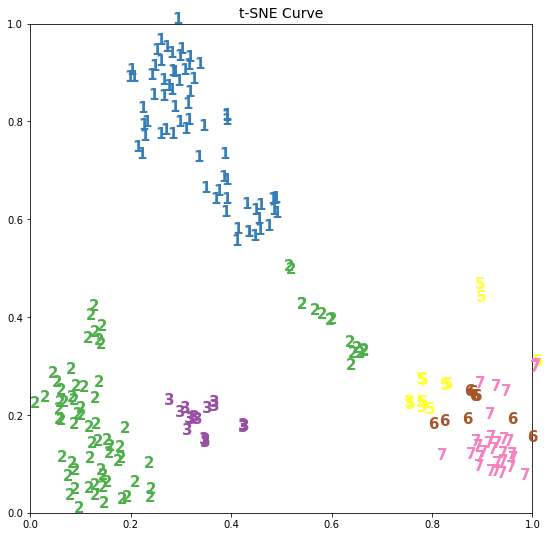

In [23]:
'''
1：建筑物窗户（泡沫处理）
2：建筑物窗户（非泡沫处理）
3：车窗（泡沫处理）
4：车窗非泡沫处理（此数据库中没有）
5：容器
6：餐具
7：灯头
'''
#数据预处理
def data_preprocessing():
    data=pd.read_csv("glass.csv")  #读取数据集
    print(data.shape)  #输出的是214x10
    label=data["Type"]
    label=label.values.tolist()
    data_list=data.values.tolist()  #将每行转为列表储存
    return data_list,label  #返回数据集、类别

#数据降维
def t_SNE(t_data):
    #t-SNE降维
    ts=manifold.TSNE(n_components=2,   #嵌入的维度（输出的维度）
            learning_rate=300.0, #学习率  建议取值为10.0-1000.0
            early_exaggeration=30, #该值越小，可视化后的间距越大
            method="exact"
            )
    #训练数据
    t_data=ts.fit_transform(t_data)  #生成x轴和y轴

    #数据归一化
    x_min,x_max=np.min(t_data,0),np.max(t_data,0)
    data_norm=(t_data-x_min)/(x_max-x_min)
    return data_norm #返回降维后的数据

#数据可视化
def matplot(ts_data,label):
    plt.figure(figsize=(9,9))  #创建画布
    plt.title('t-SNE Curve', fontsize=14)  #设置标题和字体大小
    for i in range(len(ts_data)):
        #plt.scatter(x=ts_data[i,0],y=ts_data[i,1],color=plt.cm.Set1(label[i])) 
        plt.text(x=ts_data[i][0],y=ts_data[i,1],s=str(label[i]),color=plt.cm.Set1(label[i]),fontdict={'weight': 'bold', 'size': 15})  #绘制散点图
    plt.show()  

if __name__=="__main__":
    data_x,label=data_preprocessing()

    ts_data=t_SNE(data_x)

    matplot(ts_data,label)